In [1]:
from matplotlib import pyplot as plt
import numpy as np
import AC
from sklearn.cluster import KMeans
from scipy.spatial import distance
from PIL import Image

In [2]:
def labelPoints(centers:'Numpy array shape (k,d)', data:'Numpy array shape (n,d)', *, distance=distance.euclidean):
    '''Label instances to the close center'''
    # Get the number of instances
    n = data.shape[0]
    # Array to save which center belong to a vector
    labels = np.zeros(n, dtype='uint8')
    # For every vector\instance
    for i,vector in enumerate(data):
        # Obtian the center closer to the vector
        labels[i] = np.argmin([distance(center,vector) for center in centers])
    return labels

In [318]:
def labelPoints2(centers:'Numpy array shape (k,d)', data:'Numpy array shape (n,d)', *, L=2):
    '''Label instances to the close center'''
    # Get the number of instances
    n = data.shape[0]
    # Get the number of centers
    k = centers.shape[0]
    # Array to save the distance of every vector to every center
    distances = np.zeros((k,n))
    # For every center
    for i,center in enumerate(centers):
        # Obtian the distance of every vector to the center
        distances[i] = np.linalg.norm(X - center, axis=1, ord=L)
    # Get the index where the value is min
    return np.argmin(distances, axis=0)

In [3]:
def getRandomPoint(data:'Conjunto de Datos', k:'Numero de puntos a generar', fromPoints=False):
    if fromPoints:
        n = data.shape[0]
        index = np.arange(n)
        choice = np.random.choice(index, size=k,replace=False)
        return data[choice]
    else:
        rangeValues = np.c_[data.min(axis=0),data.max(axis=0)]
        randomPoints = [[np.random.uniform(*r) for r in rangeValues] for _ in range(k)]
        return np.array(randomPoints)

In [4]:
def createCluster(center:'Size of d', std, size, *, d=1):
    randomPart = np.random.normal(0, std, size=(size,d))
    return randomPart + center

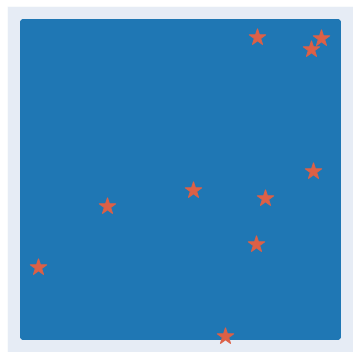

In [189]:
# Create data
x = np.arange(0,500)
y = np.arange(0,500)
result = []
for i in x:
    for j in y:
        result.append([i,j])
X = np.array(result)
# Generate centers from the range of the data
centers = getRandomPoint(X,k=10)
# Plot data
ax = AC.createFigures()
ax.scatter(X[:,0],X[:,1]);
ax.scatter(centers[:,0],centers[:,1], marker ='*', color=AC.specialRed, s=300);
ax.set_xticks([]);
ax.set_yticks([]);

In [190]:
labels = labelPoints(centers, data=X)

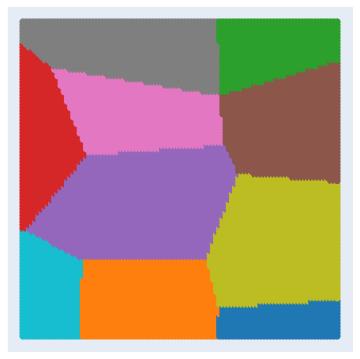

In [390]:
ax = AC.createFigures()
ax.scatter(X[:,0],X[:,1], c=labels, cmap='tab10');
#ax.scatter(centers[:,0],centers[:,1], color=AC.specialRed, s=100);
ax.set_xticks([]);
ax.set_yticks([]);

In [52]:
labels = labelPoints(centers, data=X, distance=distance.cityblock)

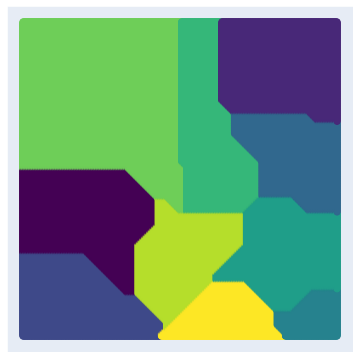

In [53]:
ax = AC.createFigures()
ax.scatter(X[:,0],X[:,1], c=labels);
#ax.scatter(centers[:,0],centers[:,1], color=AC.specialRed, s=100);
ax.set_xticks([]);
ax.set_yticks([]);

In [54]:
labels = labelPoints(centers, data=X, distance=distance.chebyshev)

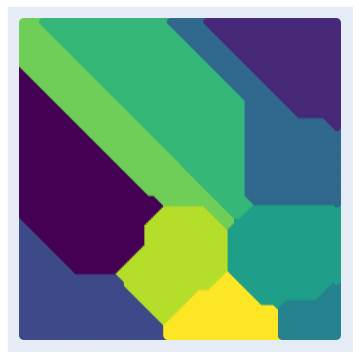

In [55]:
ax = AC.createFigures()
ax.scatter(X[:,0],X[:,1], c=labels);
#ax.scatter(centers[:,0],centers[:,1], color=AC.specialRed, s=100);
ax.set_xticks([]);
ax.set_yticks([]);

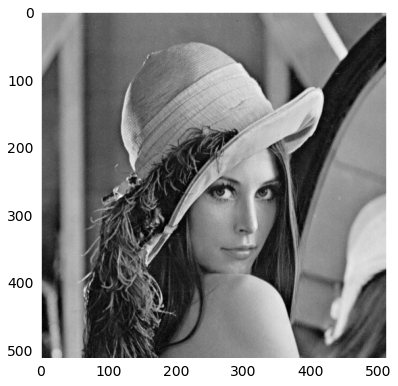

In [192]:
image = np.array(Image.open('lena_grey.jpg').convert('L'), dtype='float64')
ax = AC.createFigures()
ax.imshow(image, cmap='gray')
ax.grid(False)

In [201]:
k = 2

n = image.shape[0]
m = image.shape[1]

i = np.random.randint(0,n,size=(k,1))
j = np.random.randint(0,m,size=(k,1))
centers = np.c_[i,j]

labels = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        labels[i,j] = np.argmin([np.linalg.norm([i,j]-center) for center in centers])

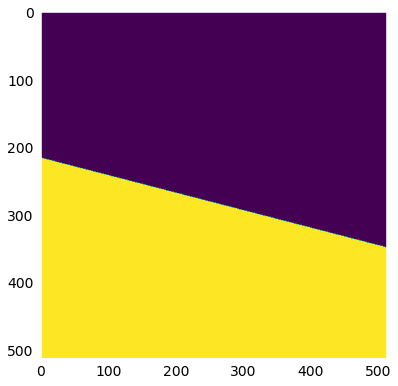

In [202]:
ax = AC.createFigures()
ax.imshow(labels);
ax.grid(False)

In [144]:
newImage = np.zeros_like(image)
for l in range(k):
    newImage[labels==l] = image[labels==l].mean()

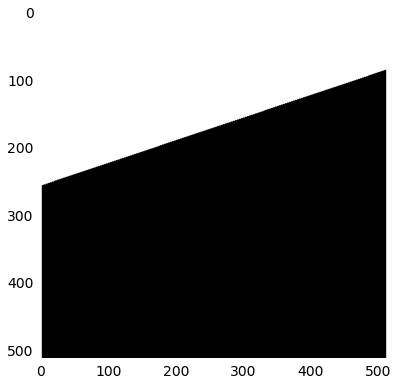

In [292]:
ax = AC.createFigures()
ax.imshow(image, cmap='gray')
ax.grid(False)

In [291]:
image[s1 == np.minimum(s1,s2)] = image[s1 == np.minimum(s1,s2)].mean()
image[s2 == np.minimum(s1,s2)] = image[s2 == np.minimum(s1,s2)].mean()

In [67]:
k = 3

n = 2#image.shape[0]
m = 2#image.shape[1]

i = np.random.randint(0,n,size=(k,1))
j = np.random.randint(0,m,size=(k,1))
centers = np.c_[i,j]

print(centers)
indx = np.indices((n,m))

temp = []
for center in centers:
    distances = np.linalg.norm(indx.T - center, axis=2)
    temp.append(distances)

print(temp[0])
print(temp[1])
print(temp[2])
#minVal = np.minimum(*temp)
#print()
#print(minVal)
#new = np.zeros_like(minVal) 
#for label in range(1,k):
#    print(temp[label]==minVal)
#    new = np.where(temp[label] == minVal, label, new)
#new

[[1 1]
 [1 0]
 [0 0]]
[[1.41421356 1.        ]
 [1.         0.        ]]
[[1.         0.        ]
 [1.41421356 1.        ]]
[[0.         1.        ]
 [1.         1.41421356]]


In [35]:
minVal

array([[0., 0.],
       [1., 1.]])

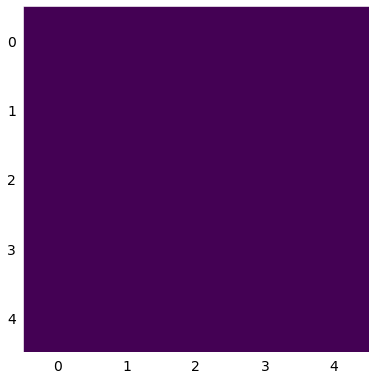

In [8]:
ax = AC.createFigures()
ax.imshow(new)
ax.grid(False)

In [303]:
n = 5#image.shape[0]
m = 5#image.shape[1]
indx = np.indices((n,m))
X = indx.T.reshape(n*m,2)
k = 2
r = np.random.choice(range(n*m), size=k, replace=False)
centers = X[r]

distances = np.zeros((k,n*m))
for i,center in enumerate(centers):
    distances[i] = np.linalg.norm(X - center, axis=1, ord=2)
labels = np.argmin(distances, axis=0)

In [ ]:
ax = AC.createFigures()
ax.scatter(x=X[:,0], y=X[:,1], c=labels);
ax.scatter(x=centers[:,0], y=centers[:,1], s=200, marker='*', color='r', alpha=0.5);

In [293]:
new = np.zeros((n,m))
for (i,j), label in zip(X, labels):
    new[j,i] = label
    
newImage = np.zeros_like(image)
for label in range(k):
    newImage[new==label] = image[new==label].mean()

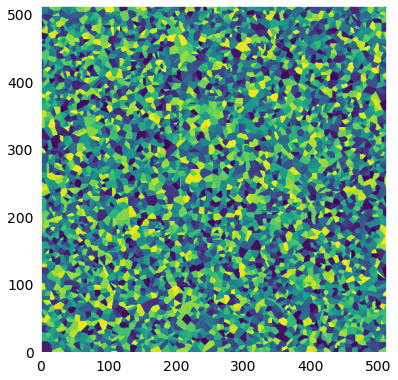

In [294]:
ax = AC.createFigures()
ax.imshow(new,origin='lower');
ax.grid(False)

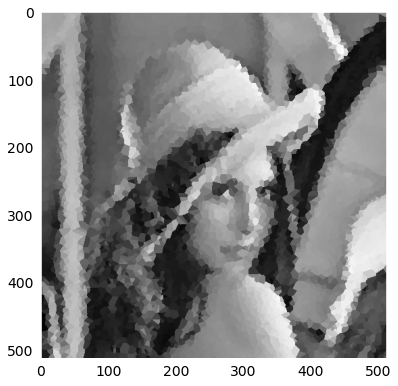

In [296]:
ax = AC.createFigures()
ax.imshow(newImage,cmap='gray')#,origin='lower');
ax.grid(False)

(1600, 2)

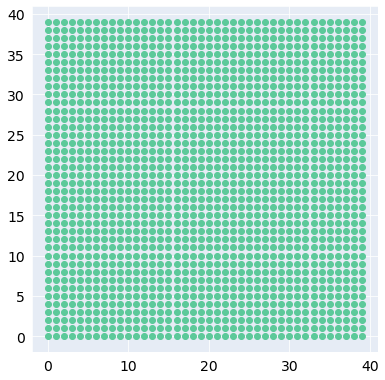

In [762]:
N = 40#image.shape[0]
M = 40#image.shape[1]
indx = np.indices((N,M))
X = indx.T.reshape(N*M,2)
ax = AC.createFigures()
ax.scatter(x=X[:,0],y=X[:,1], color=AC.specialGreen);
X.shape

In [763]:
K = 3
r = np.random.choice(range(N*M), size=K, replace=False)
U = X[r]
U

array([[34, 28],
       [16, 18],
       [ 8, 10]])

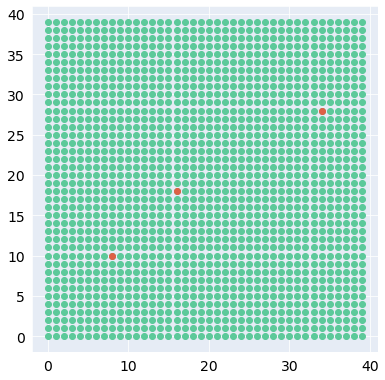

In [764]:
ax = AC.createFigures()
ax.scatter(x=X[:,0],y=X[:,1], color=AC.specialGreen);
ax.scatter(x=U[:,0],y=U[:,1], color=AC.specialRed);

In [765]:
r = labelPoints(U,X)
np.unique(r, return_counts=True)

(array([0, 1, 2], dtype=uint8), array([504, 745, 351]))

In [766]:
J = 0
for n in range(N):
    for k in range(K):
        J += (r[n] == k) * np.linalg.norm(X[n]-U)
J

1764.9418096432664

In [778]:
np.linalg.norm(X[1]-X[100], ord=2)**2

364.99999999999994

In [784]:
np.sum(X[1]**2-X[100]**2)

-403

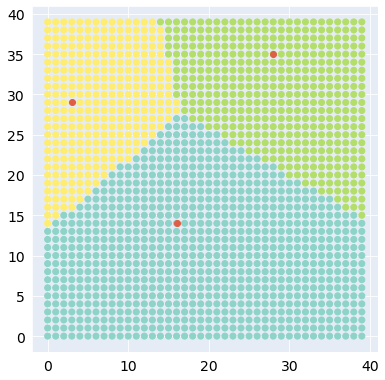

In [752]:
ax = AC.createFigures()
ax.scatter(x=X[:,0],y=X[:,1], c=rnk, cmap='Set3');
ax.scatter(x=centers[:,0],y=centers[:,1], color=AC.specialRed);

In [694]:
newCenters = np.zeros_like(centers)
for label in range(k):
    newCenters[label] = X[p1==label].mean(axis=0)
newCenters

0 

array([[ 7, 19]])

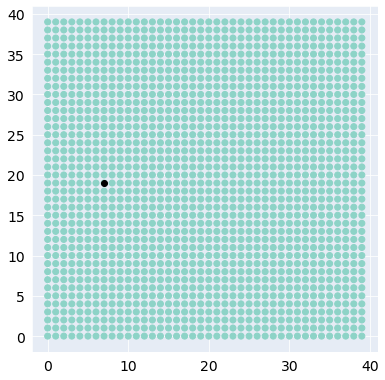

In [695]:
p1 = labelPoints(newCenters,X)
ax = AC.createFigures()
ax.scatter(x=X[:,0],y=X[:,1], c=p1, cmap='Set3');
ax.scatter(x=newCenters[:,0],y=newCenters[:,1], color='k');

In [698]:
total = 0
for label in range(k):
    total += X[p1==label]
total

133.25

In [875]:
def cost(r,U,X):
    N = X.shape[0]
    K = U.shape[0]
    J = 0
    for n in range(N):
        for k in range(K):
            J += (r[n] == k) * ((X[n] - U[k])**2).sum()
    return J

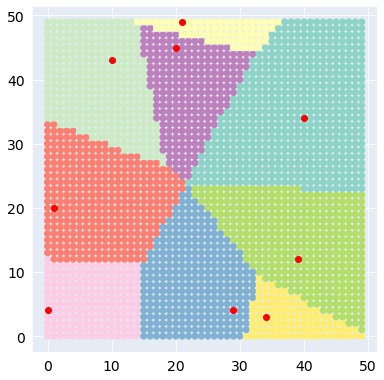

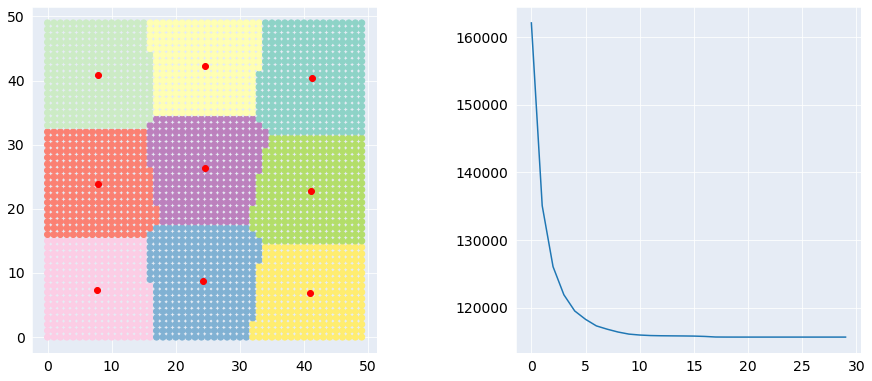

In [937]:
# Create data
N = 50
M = 50
indx = np.indices((N,M))
X = indx.T.reshape(N*M,2).astype('float64')
# Choose centers Uk
K = 9
r = np.random.choice(range(N*M), size=K, replace=False)
U = X[r]
# Find points to the closest centers U
r = labelPoints(U,X)
ax = AC.createFigures()
ax.scatter(X[:,0],X[:,1], c=r, cmap='Set3');
ax.scatter(U[:,0],U[:,1], color='r');

itera = 30
Js = np.zeros(itera)
for i in range(itera):

    Js[i] = cost(r,U,X)
    
    for label in range(K):
        U[label] = np.mean(X[r==label],axis=0)
    
    Js[i] = cost(r,U,X)
    
    # Find points to the closest centers U
    r = labelPoints(U,X)

ax = AC.createFigures(n_axes=2, columns=2, figsize=(7.2,6))
ax[0].scatter(X[:,0],X[:,1], c=r, cmap='Set3');
ax[0].scatter(U[:,0],U[:,1], color='r');
ax[1].plot(Js);

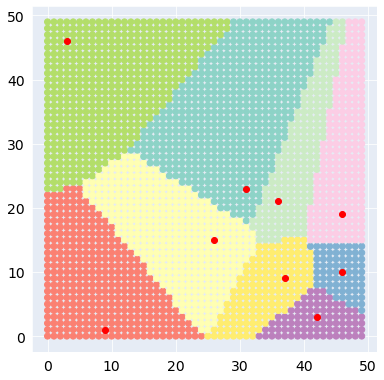

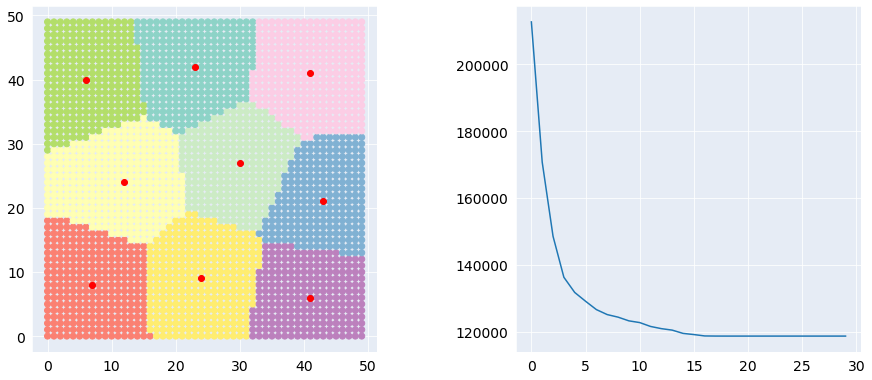

In [939]:
# Create data
N = 50
M = 50
indx = np.indices((N,M))
X = indx.T.reshape(N*M,2).astype('float64')
# Choose centers Uk
K = 9
r = np.random.choice(range(N*M), size=K, replace=False)
U = X[r]
# Find points to the closest centers U
r = labelPoints(U,X)
ax = AC.createFigures()
ax.scatter(X[:,0],X[:,1], c=r, cmap='Set3');
ax.scatter(U[:,0],U[:,1], color='r');

itera = 30
Js = np.zeros(itera)
for i in range(itera):

    Js[i] = cost(r,U,X)
    
    for label in range(K):
        U[label] = np.median(X[r==label],axis=0)
    
    Js[i] = cost(r,U,X)
    
    # Find points to the closest centers U
    r = labelPoints(U,X)

ax = AC.createFigures(n_axes=2, columns=2, figsize=(7.2,6))
ax[0].scatter(X[:,0],X[:,1], c=r, cmap='Set3');
ax[0].scatter(U[:,0],U[:,1], color='r');
ax[1].plot(Js);

In [928]:
np.mo

TypeError: remainder() takes from 2 to 3 positional arguments but 1 were given

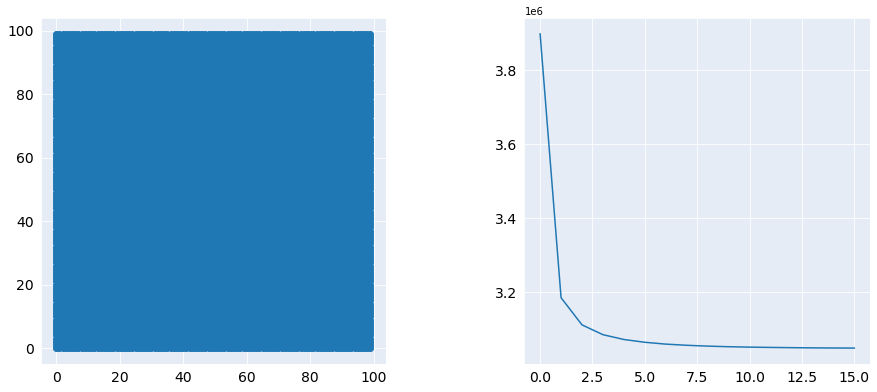

In [911]:
import io

def train_kmeans(X):
    kmeans = KMeans(n_clusters=6, verbose=2, n_init=1, max_iter=30) #<-- init=1, verbose=2
    kmeans.fit(X)
    return kmeans

#HELPER FUNCTION
#Takes the returned and printed output of a function and returns it as variables
#In this case, the returned output is the model and printed is the verbose intertia at each iteration

def redirect_wrapper(f, inp):
    old_stdout = sys.stdout
    new_stdout = io.StringIO()
    sys.stdout = new_stdout

    returned = f(inp)                #<- Call function
    printed = new_stdout.getvalue()  #<- store printed output

    sys.stdout = old_stdout
    return returned, printed


returned, printed = redirect_wrapper(train_kmeans, X)

#Extract inertia values
inertia = [float(i[i.find('inertia')+len('inertia')+1:]) for i in printed.split('\n')[1:-2]]

#Plot!
ax = AC.createFigures(n_axes=2, columns=2, figsize=(7.2,6))
ax[0].scatter(X[:,0],X[:,1]);
ax[1].plot(inertia);

In [892]:
inertia

[3543081.0,
 3118417.2198882485,
 3062707.353063133,
 3037669.878623872,
 3022652.772067584,
 3012658.0912465053,
 3006285.3101879293,
 3002136.303208271,
 2999268.3538192306,
 2997512.5357116302,
 2996158.2085032165,
 2995578.9849689184,
 2995052.4981061053,
 2994790.5515263816]

In [893]:
Js

array([3613039.21525079, 3256364.62277451, 3136169.63590346,
       3071489.39880887, 3039336.81136728, 3023623.01384642,
       3016166.09516299, 3012229.21113669, 3010156.98472995,
       3009113.90048319, 3008545.43270391, 3008263.86181582,
       3008120.9359316 , 3008011.41640415, 3007983.01441607,
       3007921.17295334, 3007812.4824238 , 3007767.54211358,
       3007743.72553279, 3007731.91031327, 3007724.48789404,
       3007719.86965601, 3007719.86965601, 3007719.86965601,
       3007719.86965601, 3007719.86965601, 3007719.86965601,
       3007719.86965601, 3007719.86965601, 3007719.86965601])